In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
dat = pd.read_csv('application_data.csv')

In [4]:
dat.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
dat.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


C:\Users\Pushkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


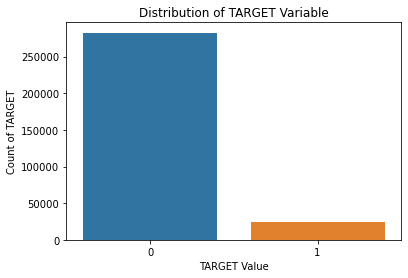

In [6]:
sns.countplot(dat.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [7]:
def column_wise_null_percentage(data1):
    output = round(data1.isnull().sum()/len(data1.index)*100,2)
    return output

In [8]:
na_val_percent = column_wise_null_percentage(dat)
na_val_percent

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

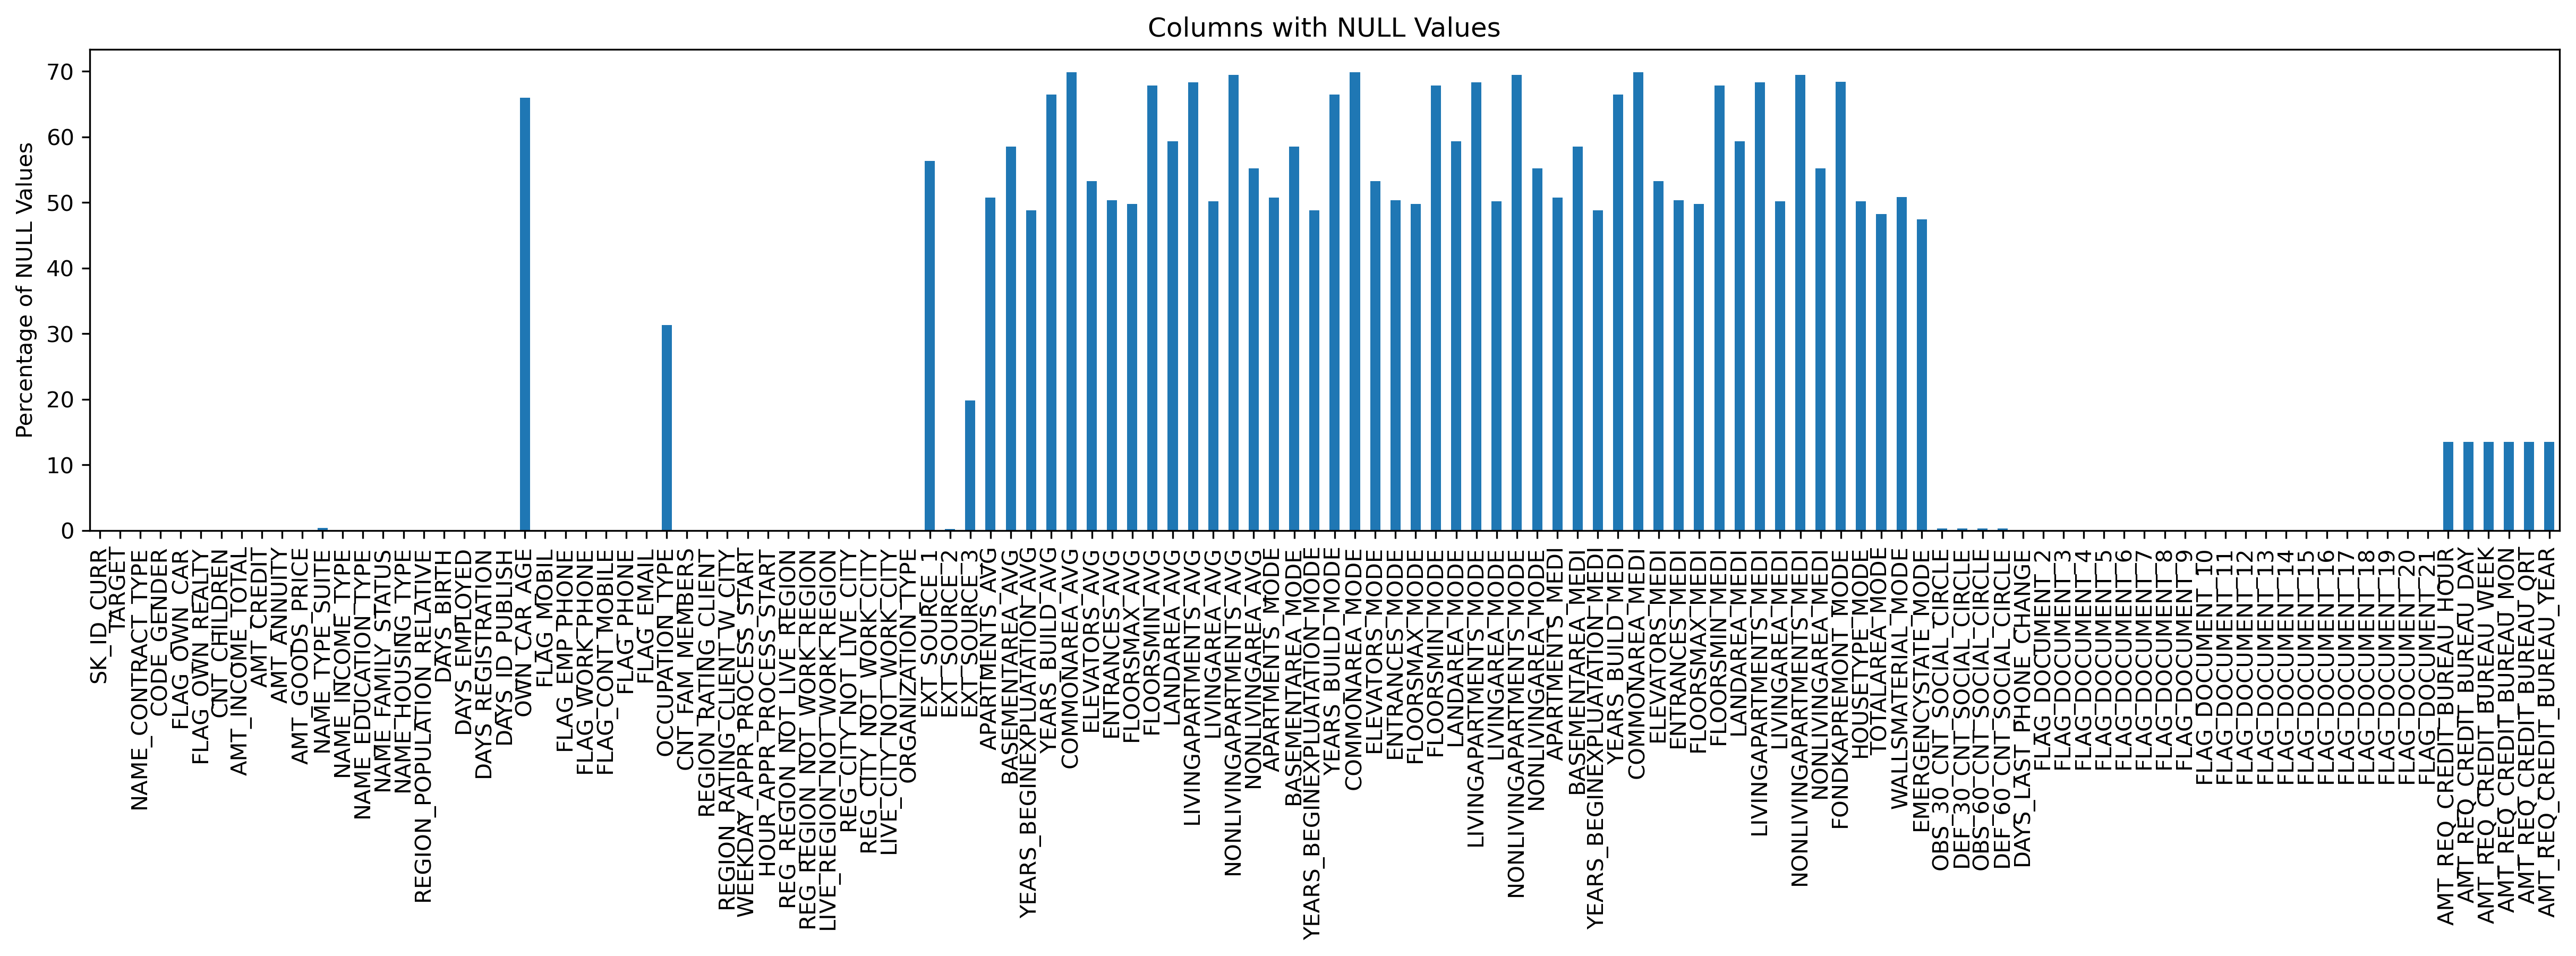

In [9]:
plt.figure(figsize= (20,4),dpi=300)
na_val_percent.plot(kind = 'bar')
plt.title ('Columns with NULL Values')
plt.ylabel('Percentage of NULL Values')
plt.show()

In [10]:
#Columns with more than 50% of null values to be removed
na_col_50 = na_val_percent[na_val_percent>50]
print("Number of columns having null value more than 50% :", len(na_col_50.index))
print(na_col_50)

Number of columns having null value more than 50% : 41
OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI          

In [11]:
dat = dat.drop(na_col_50.index, axis =1)
dat

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
categorical_cols = ['FLAG_MOBIL', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
                    'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
                    'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE']
for col in categorical_cols:
    dat[col] = dat[col].astype('category')

In [13]:
not_required_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

In [14]:
dat.drop(labels=not_required_columns,axis=1,inplace=True)

In [15]:
dat

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
defaulters=dat[dat.TARGET==1]
nondefaulters=dat[dat.TARGET==0]
defaulters.shape

(24825, 42)

In [19]:
#Calculating percentage defaulters and non defaulters

percentage_defaulters=round(100*len(defaulters)/(len(defaulters)+len(nondefaulters)),2)

percentage_nondefaulters=round(100*len(nondefaulters)/(len(defaulters)+len(nondefaulters)),2)

print('Count of defaulters:', len(defaulters))
print('Count of non defaulters:', len(nondefaulters))


print('People who paid their loan: ' , percentage_nondefaulters, '%' )
print('People who didnt pay their loan : ', percentage_defaulters, '%' )

Count of defaulters: 24825
Count of non defaulters: 282682
People who paid their loan:  91.93 %
People who didnt pay their loan :  8.07 %


In [20]:
#Columns having number of days and has negative values to be converted into positive
dat['DAYS_LAST_PHONE_CHANGE'] = dat['DAYS_LAST_PHONE_CHANGE'].abs()
dat['DAYS_REGISTRATION'] = dat['DAYS_REGISTRATION'].abs()
dat['DAYS_BIRTH'] = dat['DAYS_BIRTH'].abs()
dat['DAYS_ID_PUBLISH'] = dat['DAYS_ID_PUBLISH'].abs()
dat['DAYS_EMPLOYED'] = dat['DAYS_EMPLOYED'].abs()

In [21]:
#Removing XNA values which can be found in Gender column
dat = dat.drop(dat.loc[dat['CODE_GENDER']=='XNA'].index)
dat[dat['CODE_GENDER']=='XNA'].shape

(0, 42)

In [22]:
def charts(var, label_orientation,layout):
    if(layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_orientation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_orientation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

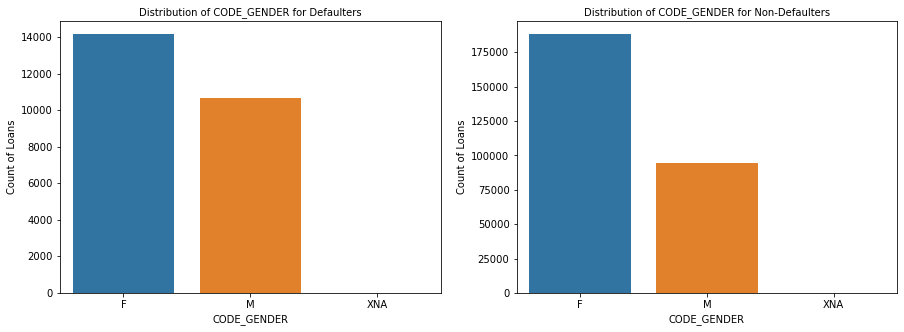

In [23]:
charts('CODE_GENDER', label_orientation=False,layout=True)

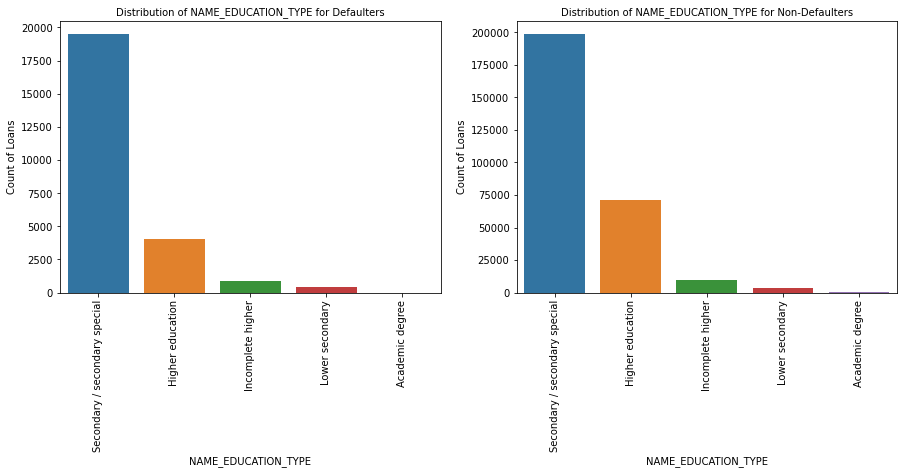

In [24]:
charts('NAME_EDUCATION_TYPE', True,True)

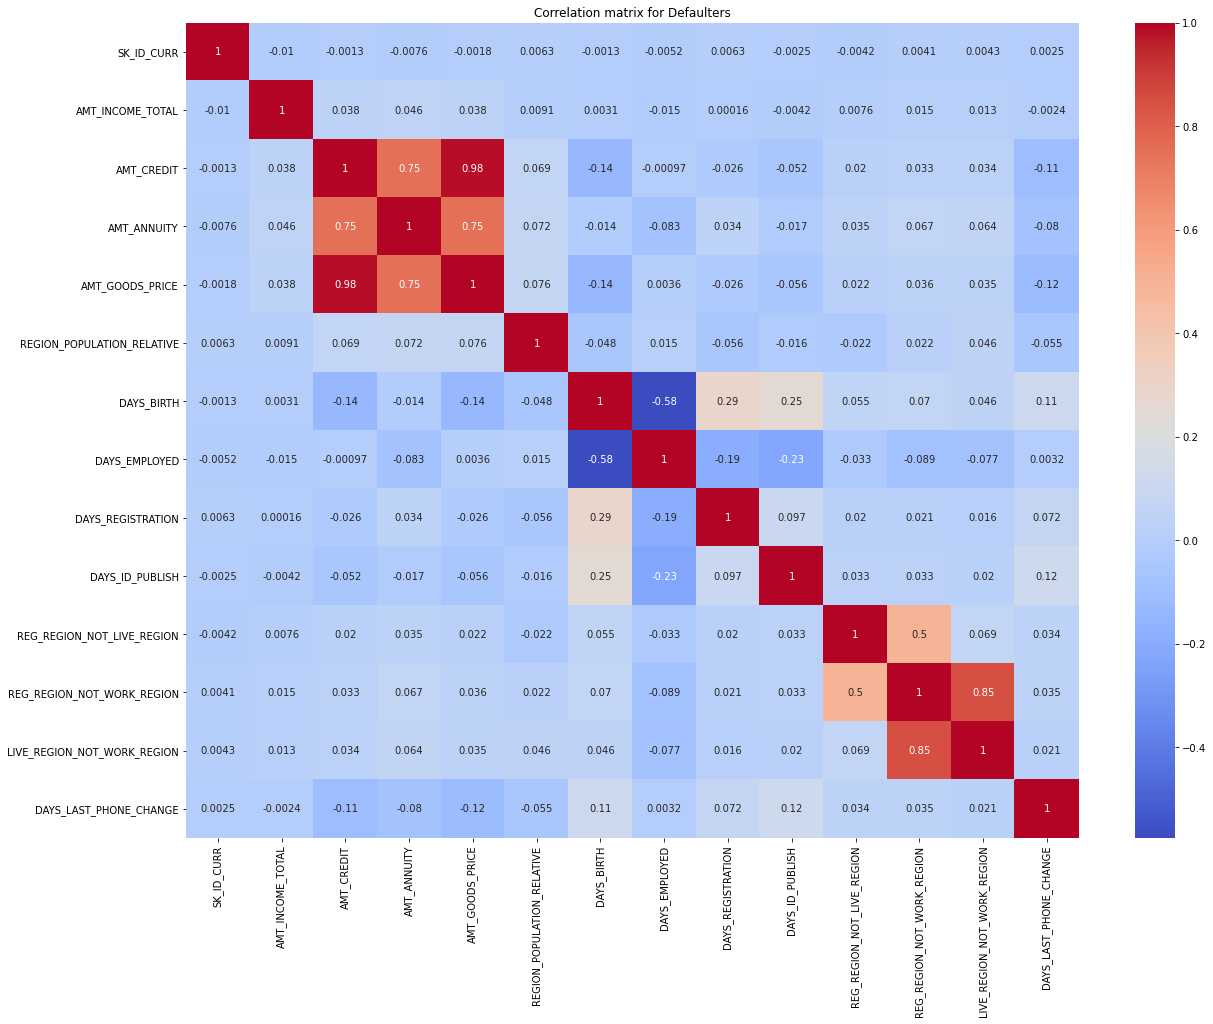

In [25]:
# for Defaulters
plt.figure(figsize=(20,15)) 
sns.heatmap(defaulters.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for Defaulters')
plt.show()

In [26]:
#Top most correlation for defaulters
correlation = defaulters.corr()
correlation_df = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
correlation_df = correlation_df.unstack().reset_index().dropna(subset = [0])
correlation_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_df['Corr_abs'] = abs(correlation_df['Correlation_Value'])
correlation_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_df.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
58,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
179,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
44,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
104,DAYS_EMPLOYED,DAYS_BIRTH,-0.575097,0.575097
164,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937,0.497937
118,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
132,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
133,DAYS_ID_PUBLISH,DAYS_EMPLOYED,-0.226470,0.226470
119,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929


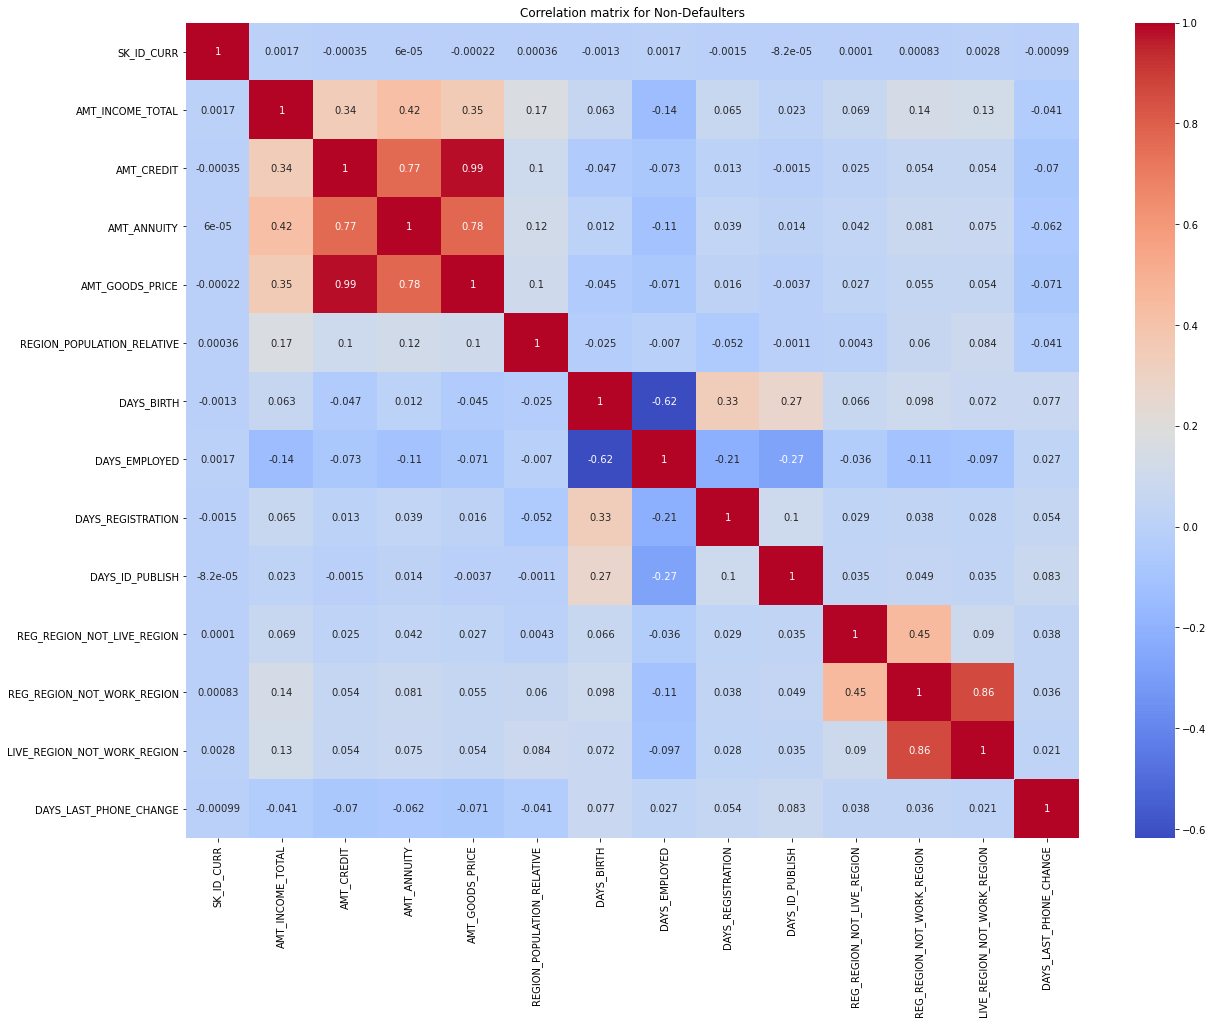

In [27]:
#For non-defaulters
plt.figure(figsize=(20,15)) 
sns.heatmap(nondefaulters.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for Non-Defaulters')
plt.show()

In [28]:
#Top most correlation in non-defaulters
correlation = nondefaulters.corr()
correlation_df = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
correlation_df = correlation_df.unstack().reset_index().dropna(subset = [0])
correlation_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_df['Corr_abs'] = abs(correlation_df['Correlation_Value'])
correlation_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_df.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
58,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
179,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
44,AMT_ANNUITY,AMT_CREDIT,0.771308,0.771308
104,DAYS_EMPLOYED,DAYS_BIRTH,-0.618051,0.618051
164,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.446101,0.446101
43,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954,0.418954
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349461,0.349461
29,AMT_CREDIT,AMT_INCOME_TOTAL,0.342801,0.342801
118,DAYS_REGISTRATION,DAYS_BIRTH,0.333143,0.333143


In [33]:
dat.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Businessman                       NaN       NaN   
                              Commercial associate    274688.372093  247500.0   
                              Maternity leave                   NaN       NaN   
                              Pensioner               203919.230769  155700.0   
                              State servant           258847.826087  225000.0   
                              Student                           NaN       NaN   
                              Unemployed                        NaN       NaN   
                              Working                 226312.500000  202500.0   
Higher education              Businessman             652500.000000  495000.0   
                              Commercial associate    242283.998486  202500.0   
                              Maternity leave         195000.000000  135000.0   
                              Pensioner               171455.114974  148500.0   
                              State servant           207116.161080  180000.0   
                              Student                 231000.000000  175500.0   
                              Unemployed              189000.000000  180000.0   
                              Working                 194014.858092  174150.0   
Incomplete higher             Businessman                       NaN       NaN   
                              Commercial associate    206220.154898  180000.0   
                              Maternity leave                   NaN       NaN   
                              Pensioner               149437.155405  135000.0   
                              State servant           173589.989610  157500.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              126000.000000   63000.0   
                              Working                 170659.490600  157500.0   
Lower secondary               Businessman                       NaN       NaN   
                              Commercial associate    168173.628261  144000.0   
                              Maternity leave                   NaN       NaN   
                              Pensioner               106468.010464   90000.0   
                              State servant           143250.000000  119250.0   
                              Student                           NaN       NaN   
                              Unemployed                        NaN       NaN   
                              Working                 140070.652174  135000.0   
Secondary / secondary special Businessman                       NaN       NaN   
                              Commercial associate    181368.704601  157500.0   
                              Maternity leave          58500.000000   58500.0   
                              Pensioner               130863.482560  112500.0   
                              State servant           159979.349061  135000.0   
                              Student                 138681.818182  144000.0   
                              Unemployed               70753.846154   63000.0   
                              Working                 154261.325853  135000.0   

                                                                         
                                                     count          max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                           
Academic degree               Businessman                0          NaN  
                              Commercial associate      43     900000.0  
                              Maternity leave            0          NaN  
                              Pensioner                 26     747000.0  
                              State servant      

**We can see that most of the loans taken were by the people from higher secondary group**

In [36]:
def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

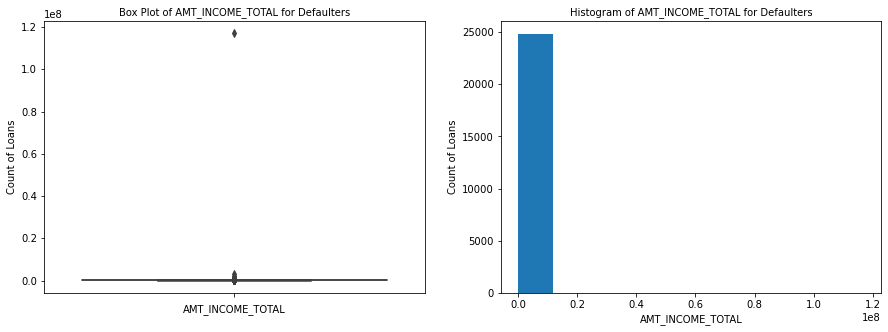

In [37]:
plot_boxhist('AMT_INCOME_TOTAL')

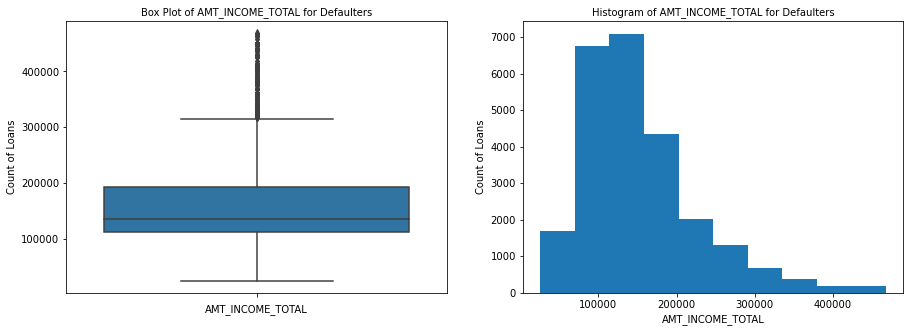

In [38]:
dat=dat[dat.AMT_INCOME_TOTAL<np.nanpercentile(dat['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=dat[dat.TARGET==1] 
nondefaulters=dat[dat.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

This tells us that most of the people with payment have an income range between 100000-200000

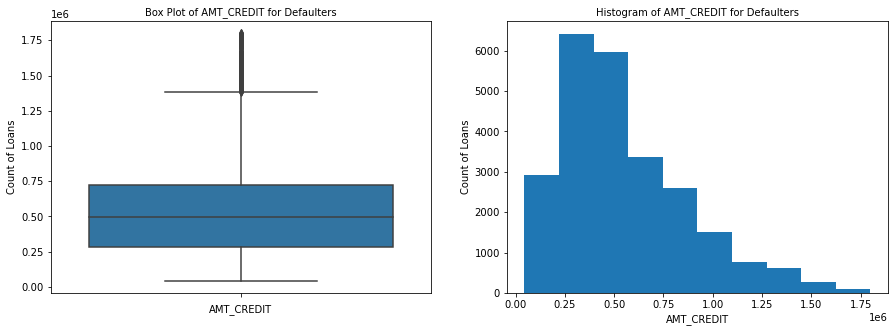

In [42]:
plot_boxhist('AMT_CREDIT')